amount of money left ecuador : 1117554
Richest ecuador : 14952.738539522516
amount of money left portugal : 773795
Richest portugal : 1321.2914676503856
amount of money left singapore: 1016681
Richest singapore : 39732.31261314505
amount of People who are broke in ecuador: 0
amount of People who are broke in singapore: 0
amount of People who are broke in portugal: 311


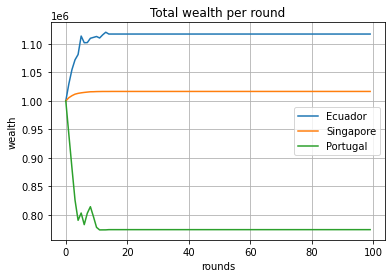

In [3]:
import random
import pandas as pd

class Main():
    def __init__(self):
        self.People = []
        self.Stocks = []
        self.WealthC1 = []
        self.WealthC2 = []
        self.WealthC3 = []
        self.Avoid = False
        self.x = []
        self.BrokePeople = []
        

    def create_population(self, size, nationality, chance):
        for i in range(0, size):
            person = People()
            person.chance = chance
            person.nationality = nationality
            self.People.append(person)
        
            
    def create_stocks(self, size):
        for i in range(0, size):
            stock = Stocks()
            self.Stocks.append(stock)

    def AvoidIt(self, chance, risk):
        if  (chance <= risk):
            self.Avoid = False
        else:
            self.Avoid = True

    def Round(self, rounds):
        for i in range(0, rounds):  
            self.x.append(i)
            self.WealthC1.append(self.addwealth("ecuador"))
            self.WealthC2.append(self.addwealth("singapore"))
            self.WealthC3.append(self.addwealth("portugal"))
            for person in self.People:
                if (person.broke == False):
                    if (person.encounterchance <= 0.7):
                        person.encounterchance = random.random()
                        stock = random.choice(self.Stocks)
                        self.AvoidIt(person.chance, stock.risk)
                        if (self.Avoid):
                            stock.encounter += 1
                            person.Trade(stock.risk)
                            person.Broke()
            
            

    def addwealth(self, nationality):
        self.Wealth = 0
        for person in self.People:
            if (person.nationality == nationality):
                self.Wealth += person.money
        return round(self.Wealth)

    def simulate(self):
        self.create_population(1000, "ecuador", 0.67)
        self.create_population(1000, "singapore", 0.08)
        self.create_population(1000, "portugal", 0.99)

        random.shuffle(self.People)

        self.create_stocks(100)

        self.Round(100)

        self.results()

    def results(self):
        print('amount of money left ecuador : {0}'.format(self.addwealth("ecuador")))
        self.richestc1 = 0
        self.richestc2 = 0
        self.richestc3 = 0
        for person in self.People:
            if (person.nationality == "ecuador"):
                if (person.money > self.richestc1):
                    self.richestc1 = person.money
            if (person.nationality == "singapore"):
                if (person.money > self.richestc2):
                    self.richestc2 = person.money
            if (person.nationality == "portugal"):
                if (person.money > self.richestc3):
                    self.richestc3 = person.money

        print('Richest ecuador : {0}'.format(self.richestc1))
        print('amount of money left portugal : {0}'.format(self.addwealth("portugal")))
        print('Richest portugal : {0}'.format(self.richestc2))
        print('amount of money left singapore: {0}'.format(self.addwealth("singapore")))
        print('Richest singapore : {0}'.format(self.richestc3))
        print('amount of People who are broke in ecuador: {0}'.format(len(list(filter(lambda person: person.broke == True and person.nationality == "ecuador", self.People)))))
        print('amount of People who are broke in singapore: {0}'.format(len(list(filter(lambda person: person.broke == True and person.nationality == "singapore", self.People)))))
        print('amount of People who are broke in portugal: {0}'.format(len(list(filter(lambda person: person.broke == True and person.nationality == "portugal", self.People)))))
        self.y = {'Ecuador': self.WealthC1, 'Singapore': self.WealthC2, 'Portugal': self.WealthC3}
        self.c1 = {'Ecuador' : self.WealthC1}
        self.c2 = {'Singapore' : self.WealthC2}
        self.c3 = {'Portugal' : self.WealthC3}
        
        

        graph = pd.DataFrame(self.y, self.x)
        graph.plot(kind='line', grid=True, title="Total wealth per round", ylabel="wealth", xlabel="rounds")


class People():
    def __init__(self):
        self.chance = random.uniform(0.3,0.6)
        self.money = 1000
        self.broke = False
        self.encounterchance = random.random()
        self.nationality = "nothing"

    def Broke(self):
        if (self.money <= 0):
            self.broke = True

    def Trade(self, risk):
        rng = random.random()
        if  (rng < risk):
            self.money = self.money - ((self.money*1.5) * risk)
        else:
            self.money = self.money + ((self.money*1.5) * risk)

class Stocks():
    def __init__(self):
        self.risk = random.random()
        self.encounter = 0

    
    
if __name__ == "__main__":
    main = Main()
    main.simulate()
